In [88]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import table
from scipy.optimize import curve_fit

In [89]:
time = [0, 12, 17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 80, 100, 120, 180, 240, 300, 360, 420, 480, 540, 600]
R = [103, 57.6, 57.8, 58.1, 58.3, 58.4, 58.6, 58.7, 58.9, 59, 59.2, 59.3, 59.8, 60.4, 60.9, 62.5, 64, 65.4, 
        66.9, 68.1, 69.3, 70.4, 71.5]

ohms = [i*1000 for i in R]

temp = [24, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 35, 35, 35, 34, 34, 33, 33, 33]

 
x = np.array(time[2:], dtype= float)  
y = np.array(temp[2:], dtype= float) 
z = np.array(ohms[2:], dtype=float)

def model(z):
    return (10**4 / (6.3379 + 5.4484*np.log10(z))) - 273.14

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
xrange(len(x))


xrange(21)

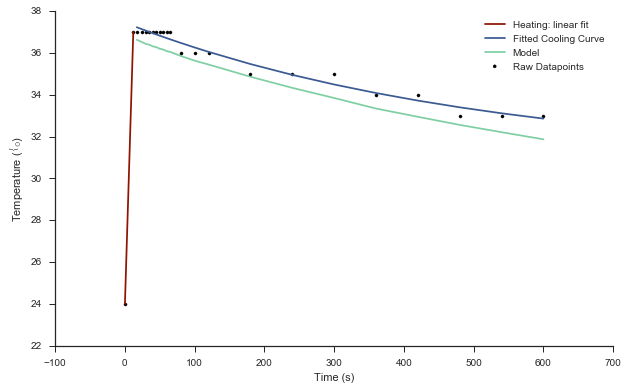

In [108]:
sns.set_style("ticks")
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(111)

ax1.plot(time[0:2], temp[0:2], sns.xkcd_rgb["brick red"], zorder=1, label = "Heating: linear fit")
ax1.scatter(time, temp, c = "k", s = 10, zorder=1, label = "Raw Datapoints")

popt, pcov = curve_fit(func, x, y)

ax1.plot(x, func(x, *popt), sns.xkcd_rgb["denim blue"], zorder = 2, label="Fitted Cooling Curve")
ax1.plot(x, model(z), sns.xkcd_rgb["emerald"] , zorder = 3, label="Model", alpha=0.5)


sns.despine(fig1, right=True, top=True)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel(r"Temperature ($^\{\circ}C$)")
ax1.grid(False)
ax1.legend()

fig1.show()
fig1.savefig("Data")



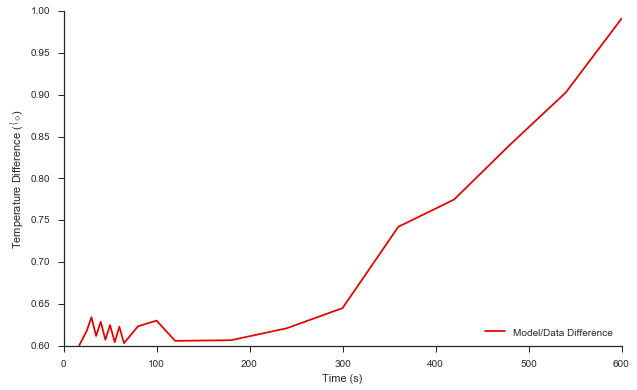

In [107]:
sns.set_style("ticks")
fig2 = plt.figure(figsize = (10,6))
ax2 = fig2.add_subplot(111)

popt, pcov = curve_fit(func, x, y)
disagreement = [abs(func(x, *popt)[i] - model(z)[i]) for i in xrange(len(x))]

ax2.plot(x, disagreement, sns.xkcd_rgb["red"], label="Model/Data Difference") 


sns.despine(fig2, right=True, top=True)

ax2.set_xlabel("Time (s)")
ax2.set_ylabel(r"Temperature Difference ($\{\circ}C$)")
ax2.grid(False)
ax2.legend(loc="lower right")
fig2.show()
fig2.savefig("error")